In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [12]:
total_df = pd.DataFrame()
for file in os.listdir('all_annotations_data'):
    name = file.split('_')[-1].split('.')[0].capitalize()
    df = pd.read_csv('all_annotations_data/'+file)
    df = df[['engaging','specific','relevant','correct','semantically appropriate','MCtx','id']]
    df['average score'] = df.drop(columns=['MCtx','id']).mean(axis=1)
    df['name'] = name

    # Drop other experiments
    for i in [0, 1,5,6,7,8]:
        df = df.drop( df[df['id'] == i].index)
    # Renaming id's
    df['id'] = df['id'].replace({2: 'High', 4: 'Medium', 3: 'Low'})
    df2 = df.rename({'id': 'Group'}, axis='columns', inplace=True)

    total_df = total_df.append([df], ignore_index = True)
    total_df['MCtx'] = pd.to_numeric(total_df['MCtx'],errors = 'coerce')


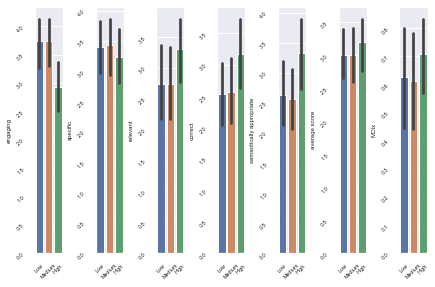

In [15]:
# Plotting data per GROUP
categories = ['engaging','specific','relevant','correct','semantically appropriate','average score','MCtx']
fig, axes = plt.subplots(1, len(categories))
sns.set(font_scale=0.5)
for category, ax in zip(categories, axes.flatten()):
    plt.xticks(rotation=90)
    sns.barplot(x="Group", data=total_df, y=category, ax=ax).set(
    xlabel= '')
plt.tight_layout()
for ax in fig.axes:
    ax.tick_params(labelrotation=45)
plt.savefig('barplot_groups.pdf')
plt.show()


In [16]:
# Test between annotators per category
for category in ['engaging','specific','relevant','correct','semantically appropriate','average score','MCtx']:
# for category in ['MCtx']:
    print('Category ', category)
    print('Mean values')
    print('High', total_df.loc[total_df['Group'] == 'High'][category].mean().round(2),
    'Medium', total_df.loc[total_df['Group'] == 'Medium'][category].mean().round(2),
    'Low', total_df.loc[total_df['Group'] == 'Low'][category].mean().round(2),
    'Category mean', total_df[category].mean().round(2))

    # ANOVA
    fvalue, pvalue = stats.f_oneway(total_df.loc[total_df['Group'] == 'High'][category].dropna(),
                                    total_df.loc[total_df['Group'] == 'Medium'][category].dropna(),
                                    total_df.loc[total_df['Group'] == 'Low'][category].dropna())
    
    print('F-value', fvalue.round(3),'p-value', pvalue.round(3))

    
    # Levene’s test for homogeneity of variance
    print('Levene’s test for homogeneity of variance')
    print(stats.levene(total_df.loc[total_df['Group'] == 'High'][category].dropna(),
                 total_df.loc[total_df['Group'] == 'Medium'][category].dropna(),
                 total_df.loc[total_df['Group'] == 'Low'][category].dropna()))

    # Kolmogorov-Smirnov test
    print('Kolmogorov-Smirnov test')
    print(stats.kstest(total_df.loc[total_df['Group'] == 'High'][category].dropna(), 'norm'))
    print(stats.kstest(total_df.loc[total_df['Group'] == 'Medium'][category].dropna() , 'norm'))
    print(stats.kstest(total_df.loc[total_df['Group'] == 'Low'][category].dropna(), 'norm' ))

    # Kruskal-Wallis H-test for independent samples
    statistic, pvalueWallis = stats.kruskal(total_df.loc[total_df['Group'] == 'High'][category].dropna(),
                                    total_df.loc[total_df['Group'] == 'Medium'][category].dropna(),
                                    total_df.loc[total_df['Group'] == 'Low'][category].dropna())
    print('Kruskal-Wallis test: ', statistic, pvalueWallis,'\n')
    

Category  engaging
Mean values
High 2.93 Medium 3.73 Low 3.73 Category mean 3.47
F-value 4.231 p-value 0.018
Levene’s test for homogeneity of variance
LeveneResult(statistic=0.20232558139534876, pvalue=0.8172121807271275)
Kolmogorov-Smirnov test
KstestResult(statistic=0.8772498680518208, pvalue=9.57429482199402e-28)
KstestResult(statistic=0.9105832013851541, pvalue=6.978794625027859e-32)
KstestResult(statistic=0.9105832013851541, pvalue=6.978794625027859e-32)
Kruskal-Wallis test:  8.227749135647391 0.01634432449116431 

Category  specific
Mean values
High 3.23 Medium 3.43 Low 3.4 Category mean 3.36
F-value 0.205 p-value 0.815
Levene’s test for homogeneity of variance
LeveneResult(statistic=0.03721129170230977, pvalue=0.9634878659687108)
Kolmogorov-Smirnov test
KstestResult(statistic=0.8439165347184875, pvalue=1.4601240193504099e-24)
KstestResult(statistic=0.8439165347184875, pvalue=1.4601240193504099e-24)
KstestResult(statistic=0.8439165347184875, pvalue=1.4601240193504099e-24)
Kruskal